# Salary Prediction
Dataset: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

Dataset: This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

- Age - the age of each employee in years.(numeric)
- Gender - the gender (male/female-categorical)
- Education Level - the educational level of each employee (high school, BS, MS, PhD - categorical)
- Job Title - job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator.(categorical)
- Years of Experience - the number of years of work experience of each employee (numeric)
- Salary - the annual salary of each employee in US dollars. vary depending on factors such as job title, years of experience, and education level. (numeric)

Objective:

- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the salary w.r.t a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

# 1. Data Exploration

In [1]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('Salary Data.csv')

#Display the first five dataset
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

# Choose target and features for the ML model
target = 'Salary'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0



Inference: The Datset consists of 6 features & 375 samples.


In [3]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

Gender                   2
Education Level          3
Years of Experience     28
Age                     31
Salary                  36
Job Title              174
dtype: int64

In [5]:
#Checking number of unique rows in each feature
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

cf.append(df['Gender'])
cf.append(df['Education Level'])
cf.append(df['Job Title'])

nf.append(df['Years of Experience'])
nf.append(df['Age'])
nf.append(df['Salary'])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 3 categorical features.


In [6]:
#Checking the stats of all the columns
display(df.describe())

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# 2. Exploratory Data Analysis (EDA)¶

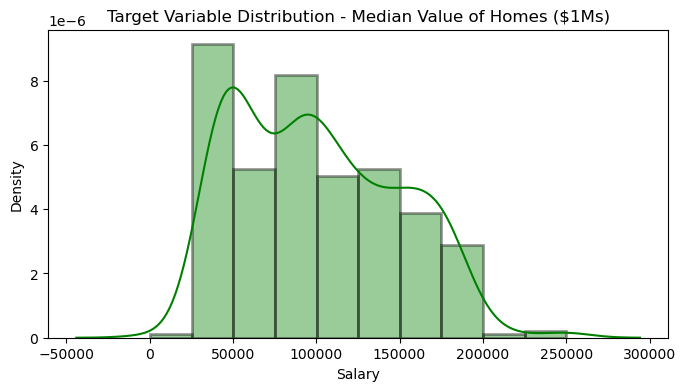


Inference: The Target Variable seems to be be normally distributed, averaging around 10 units.


In [17]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

print('\n\033[1mInference:\033[0m The Target Variable seems to be be normally distributed, averaging around 10 units.')

                               Visualising Categorical Features:                                


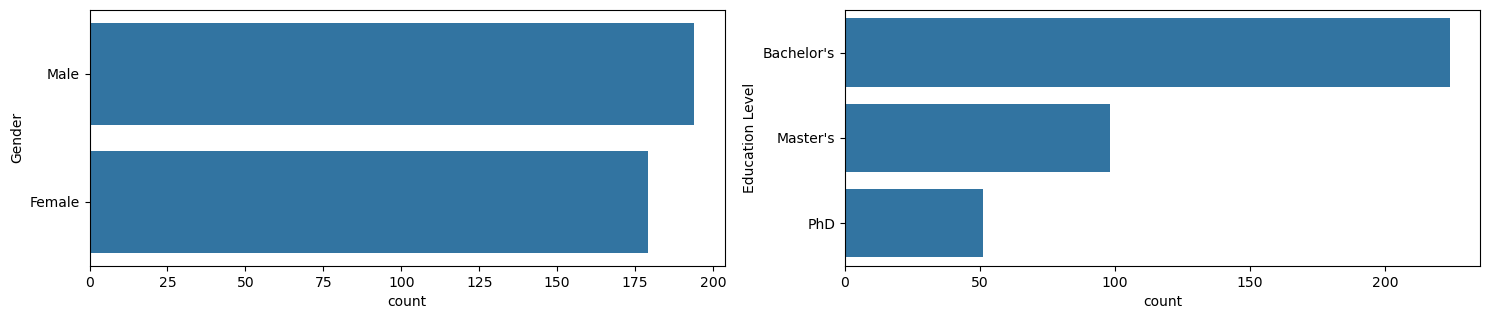

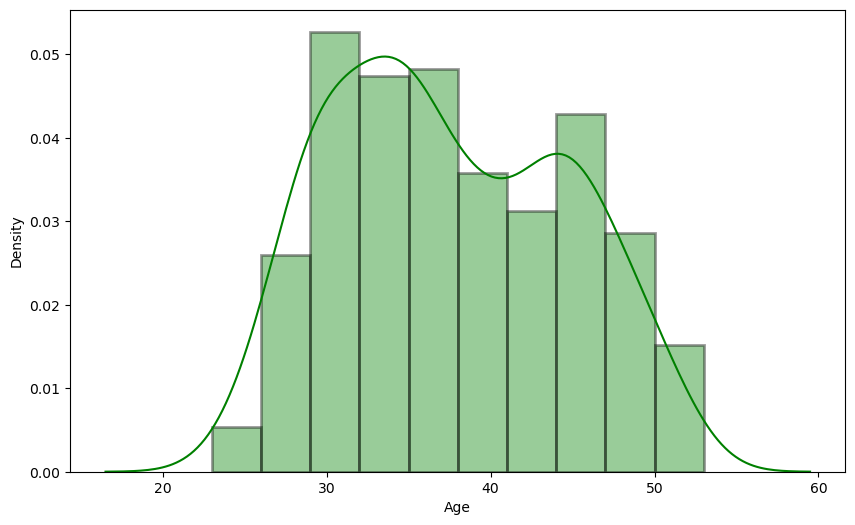

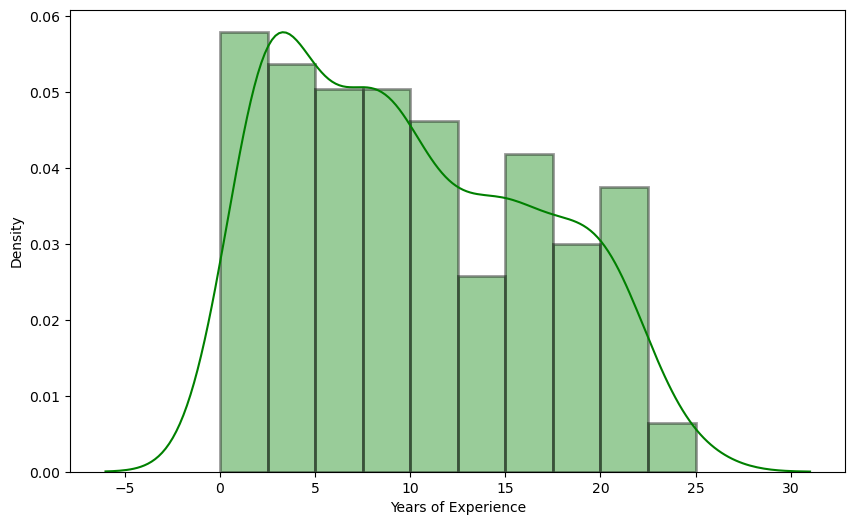


Inference: There are no categorical features in the dataset.


In [25]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)-1):
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.countplot(cf[i])

plt.tight_layout()
plt.show()

sns.distplot(df['Age'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.show()
sns.distplot(df['Years of Experience'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.show()

print('\n\033[1mInference:\033[0m There are no categorical features in the dataset.')

                                                Numeric Features Distribution                                                 


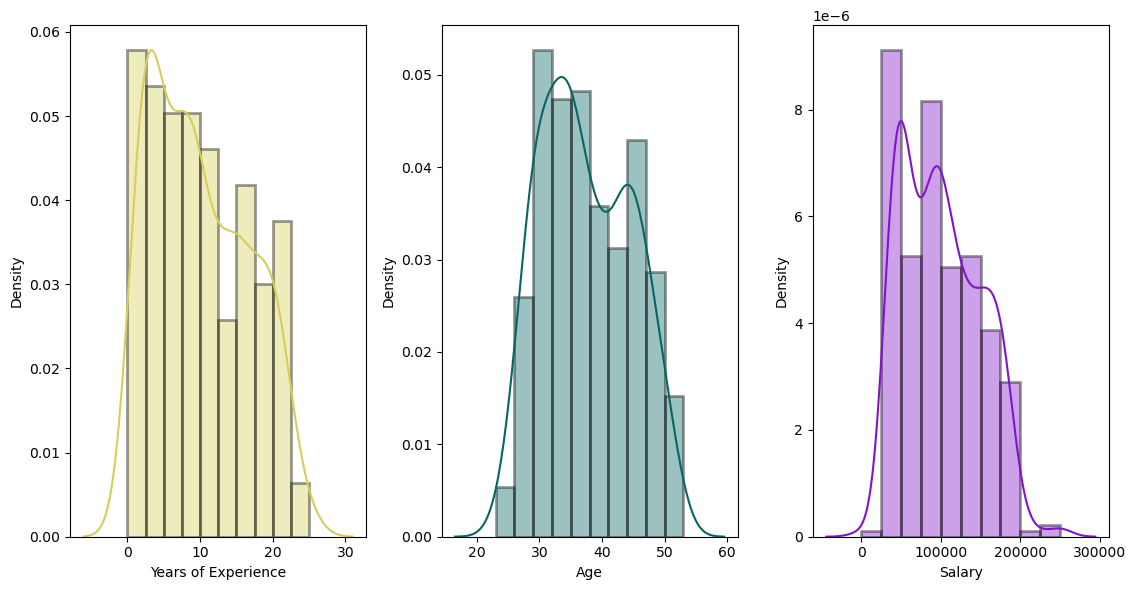

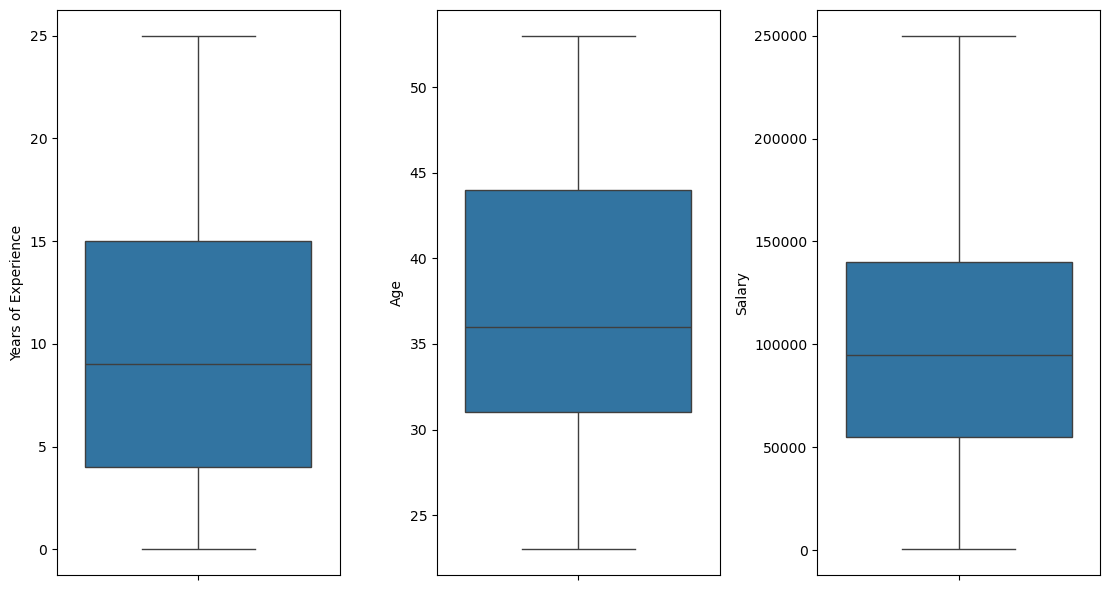


Inference: There is no outlier.


In [37]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(nf[i],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])

for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.boxplot(nf[i])
plt.tight_layout()
plt.show()

print('\n\033[1mInference:\033[0m There is no outlier.')

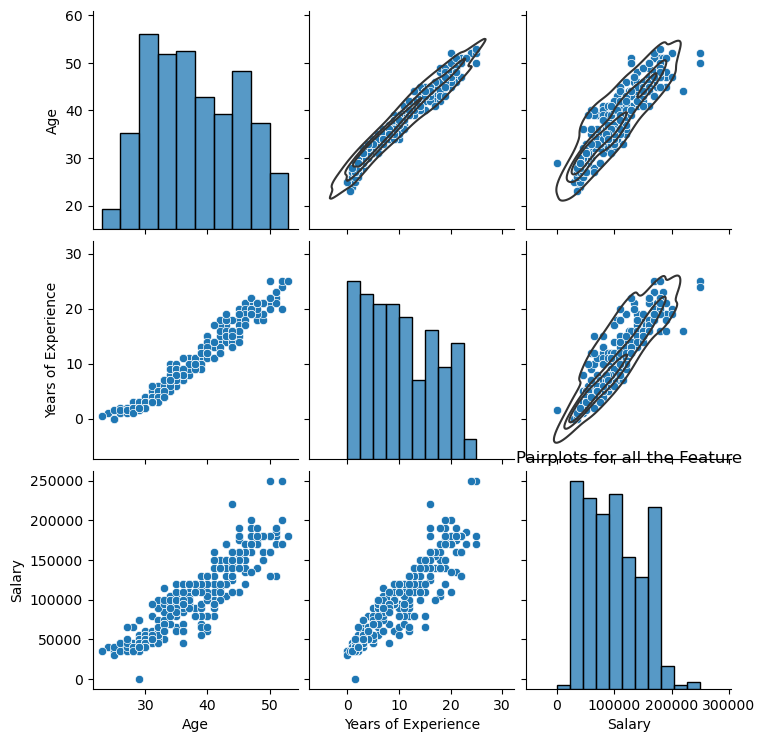


Inference: We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.


In [39]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

print('\n\033[1mInference:\033[0m We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.')